In [11]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import seaborn as sns

In [12]:
# LOAD NECESSARY CSV FILES
df_gen = pd.read_csv("/Users/joyzhong/Documents/MBD/VS/DATATHON/Generacion_fotovoltaica.csv")
df_met = pd.read_csv("/Users/joyzhong/Documents/MBD/VS/DATATHON/Meteorologia_CLEANED.csv")

In [13]:
df_gen = df_gen.rename(columns={"FECHA": "FORECAST_TIMESTAMP"})

In [14]:
df_gen["FORECAST_TIMESTAMP"] = pd.to_datetime(df_gen["FORECAST_TIMESTAMP"]) 
df_met["FORECAST_TIMESTAMP"] = pd.to_datetime(df_met["FORECAST_TIMESTAMP"])

In [15]:
df_met["FORECAST_TIMESTAMP"] = df_met["FORECAST_TIMESTAMP"].dt.tz_localize(None)

In [16]:
# FINAL MERGED DATA FRAME
df_merged = pd.merge(df_met, df_gen, on="FORECAST_TIMESTAMP", how="left")
df_merged.set_index("FORECAST_TIMESTAMP", inplace=True)
df_merged.head()

,LATITUDE,LONGITUDE,10uheightAboveGround_10,10vheightAboveGround_10,2rheightAboveGround_2,2shheightAboveGround_2,2theightAboveGround_2,SUNSDsurface_0,aptmpheightAboveGround_2,dlwrfsurface_0,...,tccatmosphere_0,theightAboveGround_80,tmaxheightAboveGround_2,tminheightAboveGround_2,tozneatmosphereSingleLayer_0,tpsurface_0,tsurface_0,uheightAboveGround_80,vheightAboveGround_80,TOTAL_KWH_ENERGIA
FORECAST_TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2023-07-24 11:00:00,40.0,-4.0,6.989717,1.524463,19.6,0.005070,301.667859,18000.0,300.244031,318.407690,...,0.8,298.878662,301.632129,291.701489,324.006396,0.0,316.100012,7.979102,1.763457,NaN
2023-07-24 12:00:00,40.0,-4.0,7.526357,1.301797,18.4,0.005260,303.365576,21600.0,301.470923,323.107690,...,1.7,300.500000,303.363452,291.701489,325.803369,0.0,318.700000,8.801675,1.623066,115.66
2023-07-24 13:00:00,40.0,-4.0,8.506143,1.294370,18.2,0.005665,304.854614,3600.0,302.703198,357.800000,...,8.8,301.995581,304.815100,303.400000,326.096606,0.0,319.277295,9.977305,1.662959,129.98
2023-07-24 14:00:00,40.0,-4.0,9.392205,1.283123,17.4,0.005709,305.681506,7200.0,303.544031,362.248731,...,5.0,302.944043,305.689685,303.400000,326.790967,0.0,318.515942,11.152161,1.711703,134.35
2023-07-24 15:00:00,40.0,-4.0,10.167048,1.555879,18.3,0.006080,305.976172,10800.0,303.834607,365.100000,...,35.8,303.432275,305.995581,303.400000,329.955933,0.0,316.435266,12.256921,2.011133,133.90


In [17]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100557 entries, 2023-07-24 11:00:00 to 2024-10-31 23:00:00
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   LATITUDE                      100557 non-null  float64
 1   LONGITUDE                     100557 non-null  float64
 2   10uheightAboveGround_10       100557 non-null  float64
 3   10vheightAboveGround_10       100557 non-null  float64
 4   2rheightAboveGround_2         100557 non-null  float64
 5   2shheightAboveGround_2        100557 non-null  float64
 6   2theightAboveGround_2         100557 non-null  float64
 7   SUNSDsurface_0                100556 non-null  float64
 8   aptmpheightAboveGround_2      100557 non-null  float64
 9   dlwrfsurface_0                100557 non-null  float64
 10  dswrfsurface_0                100557 non-null  float64
 11  gustsurface_0                 100557 non-null  float64
 12  msletmeanS

In [18]:
# CHECK FOR DUPLICATES
df_merged.index.duplicated().sum() 

89384

In [19]:
# GET UNIQUE LAT LON PAIRS 
df_merged["LAT_LON_PAIR"] = df_merged.apply(lambda row: (row["LATITUDE"], row["LONGITUDE"]), axis=1)
df_merged["LAT_LON_PAIR"].unique()
df_unique_locations = pd.DataFrame(df_merged["LAT_LON_PAIR"].unique(), columns=["LAT_LON_PAIR"])
df_unique_locations

,LAT_LON_PAIR
0,"(40.0, -4.0)"
1,"(40.0, -3.75)"
2,"(40.0, -3.5)"
3,"(40.25, -4.0)"
4,"(40.25, -3.75)"
5,"(40.25, -3.5)"
6,"(40.5, -4.0)"
7,"(40.5, -3.75)"
8,"(40.5, -3.5)"


In [20]:
# FIND THE 4 CLOSEST LAT LON PAIRS TO PINTO
pinto_lat, pinto_lon = 40.2415, -3.6986

lat_lon_array = np.array([
    (40.0, -4.0), (40.0, -3.75), (40.0, -3.5),
    (40.25, -4.0), (40.25, -3.75), (40.25, -3.5),
    (40.5, -4.0), (40.5, -3.75), (40.5, -3.5)
], dtype=object)

df_locations = pd.DataFrame(lat_lon_array, columns=["LATITUDE", "LONGITUDE"])

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

df_locations["Distance_km"] = df_locations.apply(
    lambda row: haversine(row["LATITUDE"], row["LONGITUDE"], pinto_lat, pinto_lon), axis=1
)

closest_points = df_locations.nsmallest(4, "Distance_km")

print(closest_points)  

  LATITUDE LONGITUDE  Distance_km
4    40.25     -3.75     4.463680
5    40.25      -3.5    16.882234
3    40.25      -4.0    25.598137
1     40.0     -3.75    27.206907


In [21]:
# ONLY INCLUDE ROWS THAT HAVE THE ABOVE LAT LONG PAIRS
df_filtered = df_merged[
    df_merged[["LATITUDE", "LONGITUDE"]].apply(tuple, axis=1).isin(
        closest_points[["LATITUDE", "LONGITUDE"]].apply(tuple, axis=1)
    )
]

In [22]:
# DROP UNNEEDED COLUMNS
df_v1 = df_filtered.drop(columns=["LAT_LON_PAIR", "LATITUDE", "LONGITUDE"], errors="ignore")

In [23]:
# FILTERED DF WITH DATA ONLY IN THOSE 4 LOCATIONS
df_v1.head()

,10uheightAboveGround_10,10vheightAboveGround_10,2rheightAboveGround_2,2shheightAboveGround_2,2theightAboveGround_2,SUNSDsurface_0,aptmpheightAboveGround_2,dlwrfsurface_0,dswrfsurface_0,gustsurface_0,...,tccatmosphere_0,theightAboveGround_80,tmaxheightAboveGround_2,tminheightAboveGround_2,tozneatmosphereSingleLayer_0,tpsurface_0,tsurface_0,uheightAboveGround_80,vheightAboveGround_80,TOTAL_KWH_ENERGIA
FORECAST_TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2023-07-24 11:00:00,6.629717,1.254463,17.5,0.004574,301.767859,18000.0,300.344031,319.80769,570.040,7.500171,...,0.0,299.078662,301.832129,292.501489,322.706396,0.0,316.600012,7.379102,1.483457,NaN
2023-07-24 12:00:00,7.186357,1.511797,17.3,0.004918,303.265576,21600.0,301.370923,323.60769,636.432,8.730784,...,0.0,300.400000,303.263452,292.501489,323.303369,0.0,318.500000,8.081675,1.803066,115.66
2023-07-24 13:00:00,7.806143,1.284370,17.1,0.005276,304.654614,3600.0,302.603198,353.40000,984.480,9.603244,...,60.2,301.895581,304.615100,303.200000,324.496606,0.0,319.577295,8.977305,1.582959,129.98
2023-07-24 14:00:00,9.322205,0.843123,17.0,0.005565,305.581506,7200.0,303.444031,359.14873,960.260,10.810358,...,5.0,302.944043,305.589685,303.200000,326.790967,0.0,318.415942,10.752161,1.211703,134.35
2023-07-24 15:00:00,9.707048,1.075879,17.2,0.005734,306.076172,10800.0,303.834607,362.30000,921.620,11.529451,...,5.0,303.632275,306.095581,303.200000,328.955933,0.0,316.835266,11.256921,1.411133,133.90


In [24]:
df_v1.index.duplicated().sum()

33519

In [25]:
# TO DEAL WITH DUPLICATES, GET THE AVERAGE VALUES OF EACH TIMESTAMP
df_aggregated = df_v1.groupby("FORECAST_TIMESTAMP").mean().reset_index()
df_aggregated.head()

,FORECAST_TIMESTAMP,10uheightAboveGround_10,10vheightAboveGround_10,2rheightAboveGround_2,2shheightAboveGround_2,2theightAboveGround_2,SUNSDsurface_0,aptmpheightAboveGround_2,dlwrfsurface_0,dswrfsurface_0,...,tccatmosphere_0,theightAboveGround_80,tmaxheightAboveGround_2,tminheightAboveGround_2,tozneatmosphereSingleLayer_0,tpsurface_0,tsurface_0,uheightAboveGround_80,vheightAboveGround_80,TOTAL_KWH_ENERGIA
0,2023-07-24 11:00:00,6.332217,2.824463,17.250,0.004541,301.817859,18000.0,300.344031,319.60769,570.150,...,2.175,299.128662,301.857129,292.376489,324.256396,0.0,316.500012,7.146602,2.933457,NaN
1,2023-07-24 12:00:00,6.753857,3.519297,17.200,0.004855,303.065576,21600.0,301.245923,323.53269,635.964,...,2.450,300.225000,303.088452,292.376489,325.128369,0.0,318.350000,7.684175,3.688066,115.66
2,2023-07-24 13:00:00,7.348643,3.731870,16.975,0.005158,304.279614,3600.0,302.228198,352.60000,981.425,...,35.500,301.420581,304.240100,303.100000,325.871606,0.0,319.102295,8.467305,3.987959,129.98
3,2023-07-24 14:00:00,8.504705,3.653123,16.925,0.005407,305.131506,7200.0,302.994031,356.97373,959.230,...,6.525,302.344043,305.139685,303.100000,326.990967,0.0,318.190942,9.852161,4.011703,134.35
4,2023-07-24 15:00:00,8.974548,3.895879,17.325,0.005695,305.676172,10800.0,303.484607,359.87500,920.315,...,46.025,303.132275,305.695581,303.100000,330.205933,0.0,316.435266,10.531921,4.336133,133.90


In [26]:
# CHECK DUPLICATES AGAIN - NONE !
df_aggregated.index.duplicated().sum()

0

In [27]:
# NOW WE NEED TO FILL IN THE NULL KWH VALUES - CREATE AN ML MODEL TO PREDICT KWH
df = df_aggregated.copy()

df_train = df[df["TOTAL_KWH_ENERGIA"].notnull()] 
df_missing = df[df["TOTAL_KWH_ENERGIA"].isnull()]  

features = [col for col in df.columns if col != "TOTAL_KWH_ENERGIA" and col != "FORECAST_TIMESTAMP"]

X_train = df_train[features]
y_train = df_train["TOTAL_KWH_ENERGIA"]

X_missing = df_missing[features]

In [28]:
# USE XG BOOST BC IT HANDLES MISSING DATA WELL,WORKS WELL WITH STRUCTURED DATA, AND CAPTURES NON LINEAR RELATIONSHIPS
# FIRST WE TRAIN THE MODEL
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train_part, y_train_part)

y_pred_valid = xgb_model.predict(X_valid)
mae = mean_absolute_error(y_valid, y_pred_valid)
print(f"Validation MAE: {mae:.4f}")


Validation MAE: 9.6802


In [29]:
# USE MODEL TO FILL MISSING VALUES
predicted_values = xgb_model.predict(X_missing)

df.loc[df["TOTAL_KWH_ENERGIA"].isnull(), "TOTAL_KWH_ENERGIA"] = predicted_values


In [30]:
# SAVE TRAINED MODEL 
joblib.dump(xgb_model, "xgboost_solar_filler.pkl")

xgb_model = joblib.load("xgboost_solar_filler.pkl")

new_predictions = xgb_model.predict(X_missing)

In [31]:
# XG BOOST & RANDOM FOREST
df = df_aggregated.copy()

df_train = df[df["TOTAL_KWH_ENERGIA"].notnull()]
df_missing = df[df["TOTAL_KWH_ENERGIA"].isnull()]

features = [col for col in df.columns if col not in ["TOTAL_KWH_ENERGIA", "FORECAST_TIMESTAMP"]]

X = df_train[features]
y = df_train["TOTAL_KWH_ENERGIA"]

X = X[y.notnull()]
y = y.dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train_part, y_train_part)

rf_model.fit(X_train_part, y_train_part)

y_pred_xgb = xgb_model.predict(X_valid)
y_pred_rf = rf_model.predict(X_valid)

y_pred_ensemble = (y_pred_xgb + y_pred_rf) / 2  

mae_ensemble = mean_absolute_error(y_valid, y_pred_ensemble)

print(f"✅ Combined Model (Ensemble) Validation MAE: {mae_ensemble:.4f}")

✅ Combined Model (Ensemble) Validation MAE: 9.6535


In [ ]:
# USE XGBOOST & RANDOM FOREST MODEL TO FILL IN MISSING VALUES
if not df_missing.empty:
    X_missing = df_missing[features]  # Use same feature set
    y_pred_missing_xgb = xgb_model.predict(X_missing)
    y_pred_missing_rf = rf_model.predict(X_missing)

    # Ensemble prediction for missing values
    df.loc[df["TOTAL_KWH_ENERGIA"].isnull(), "TOTAL_KWH_ENERGIA"] = (y_pred_missing_xgb + y_pred_missing_rf) / 2

print("Missing values filled successfully!")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11173 entries, 0 to 11172
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   FORECAST_TIMESTAMP            11173 non-null  datetime64[ns]
 1   10uheightAboveGround_10       11173 non-null  float64       
 2   10vheightAboveGround_10       11173 non-null  float64       
 3   2rheightAboveGround_2         11173 non-null  float64       
 4   2shheightAboveGround_2        11173 non-null  float64       
 5   2theightAboveGround_2         11173 non-null  float64       
 6   SUNSDsurface_0                11173 non-null  float64       
 7   aptmpheightAboveGround_2      11173 non-null  float64       
 8   dlwrfsurface_0                11173 non-null  float64       
 9   dswrfsurface_0                11173 non-null  float64       
 10  gustsurface_0                 11173 non-null  float64       
 11  msletmeanSea_0              

In [32]:
# Save the trained models
joblib.dump(xgb_model, "xgb_model.pkl")
joblib.dump(rf_model, "rf_model.pkl")
print("✅ Models saved successfully!")


✅ Models saved successfully!


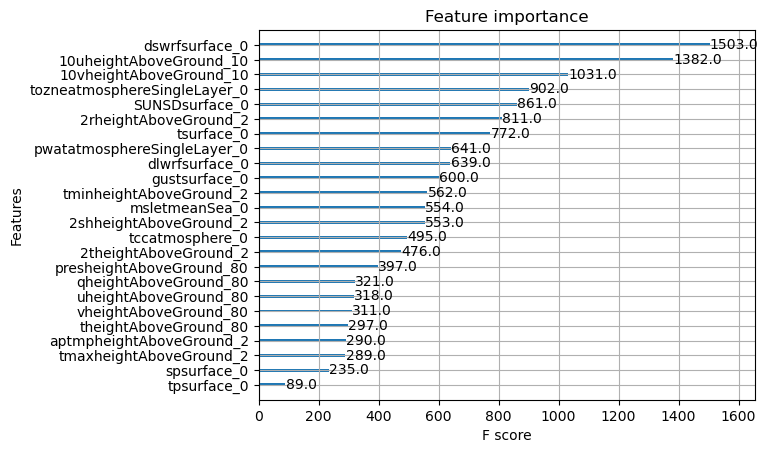

In [33]:
# MAE NEEDS IMPROVEMENT - LETS DO SOME FINE TUNING/VALIDATING
# LETS SEE WHICH FEATURES CONTRIBUTE MOST TO THE PREDICTIONS
xgb.plot_importance(xgb_model, importance_type="weight", max_num_features=27)
plt.show()

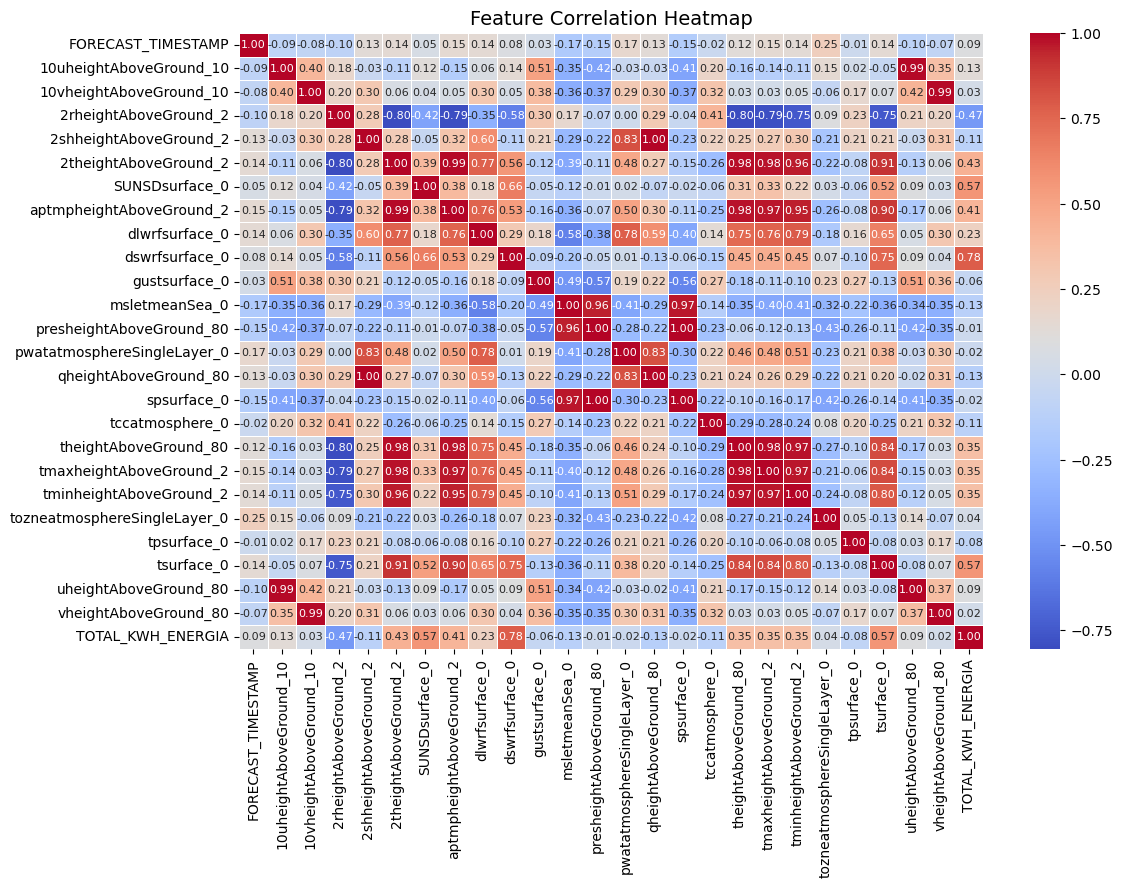

In [34]:
# HEATMAP TO SHOW CORRELATION
corr_matrix = df_aggregated.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    annot_kws={"size": 8}  
)

plt.title("Feature Correlation Heatmap", fontsize=14)

plt.show()


In [35]:
# FEATURE ENGINEERING
#Rolling Mean Features: Capture recent trends (e.g., 3-hour or 6-hour rolling means of solar_radiation).
#Lag Features: Include past values of TOTAL_KWH_ENERGIA (lag-1, lag-24).
#Interaction Features: Compute new features like solar_radiation / cloud_cover to enhance model learning.

In [ ]:

# Ensure 'adj. close' has no missing values before applying rolling calculations
merged_df['adj. close'].fillna(method='ffill', inplace=True)
merged_df['adj. close'].fillna(method='bfill', inplace=True)

# Apply moving averages and volatility
merged_df['MA_5'] = merged_df['adj. close'].rolling(window=5, min_periods=1).mean()
merged_df['MA_20'] = merged_df['adj. close'].rolling(window=20, min_periods=1).mean()
merged_df['volatility_10'] = merged_df['adj. close'].rolling(window=10, min_periods=1).std()

# Fill any remaining NaNs in features
merged_df[['MA_5', 'MA_20', 'volatility_10']] = merged_df[['MA_5', 'MA_20', 'volatility_10']].fillna(method='bfill')

display(merged_df.head())